In [1]:
import torch
import matplotlib.pyplot as plt

no_cuda = False
use_cuda = not no_cuda and torch.cuda.is_available()
device_name  = "cuda:0" if use_cuda else "cpu"
device = torch.device(device_name)

@ torch.no_grad()
def loading(loaded):
    control_action_extracted = loaded['control_action']
    position_extracted = loaded['position']
    
    try:
        target_extracted = loaded['target']
        target = target_extracted
        position = position_extracted
        control_action = control_action_extracted

    except KeyError:
        # print("target not found")
        target = []
        position = position_extracted
        control_action = control_action_extracted
    
    return control_action,position,target

In [2]:
name_of_test_file = './Tasks/chirp.pt'
chirp = torch.load(name_of_test_file,map_location=device) #

name_of_test_file = './Tasks/circle.pt'
circle = torch.load(name_of_test_file,map_location=device) #

name_of_test_file = './Tasks/multisinusoidal.pt'
multisinusoidal = torch.load(name_of_test_file,map_location=device) #

name_of_test_file = './Tasks/vertical_spiral.pt'
vertical_spiral = torch.load(name_of_test_file,map_location=device) #

control_action_chirp,position_chirp,target_nominal = loading(chirp)
control_action_multisinusoidal,position_multisinusoidal,target_nominal = loading(multisinusoidal)

# OSC TASKS
control_action_circle,position_circle,target_circle = loading(circle)
control_vertical_spiral,pos_vertical_spiral,target_vertical_spiral = loading(vertical_spiral)

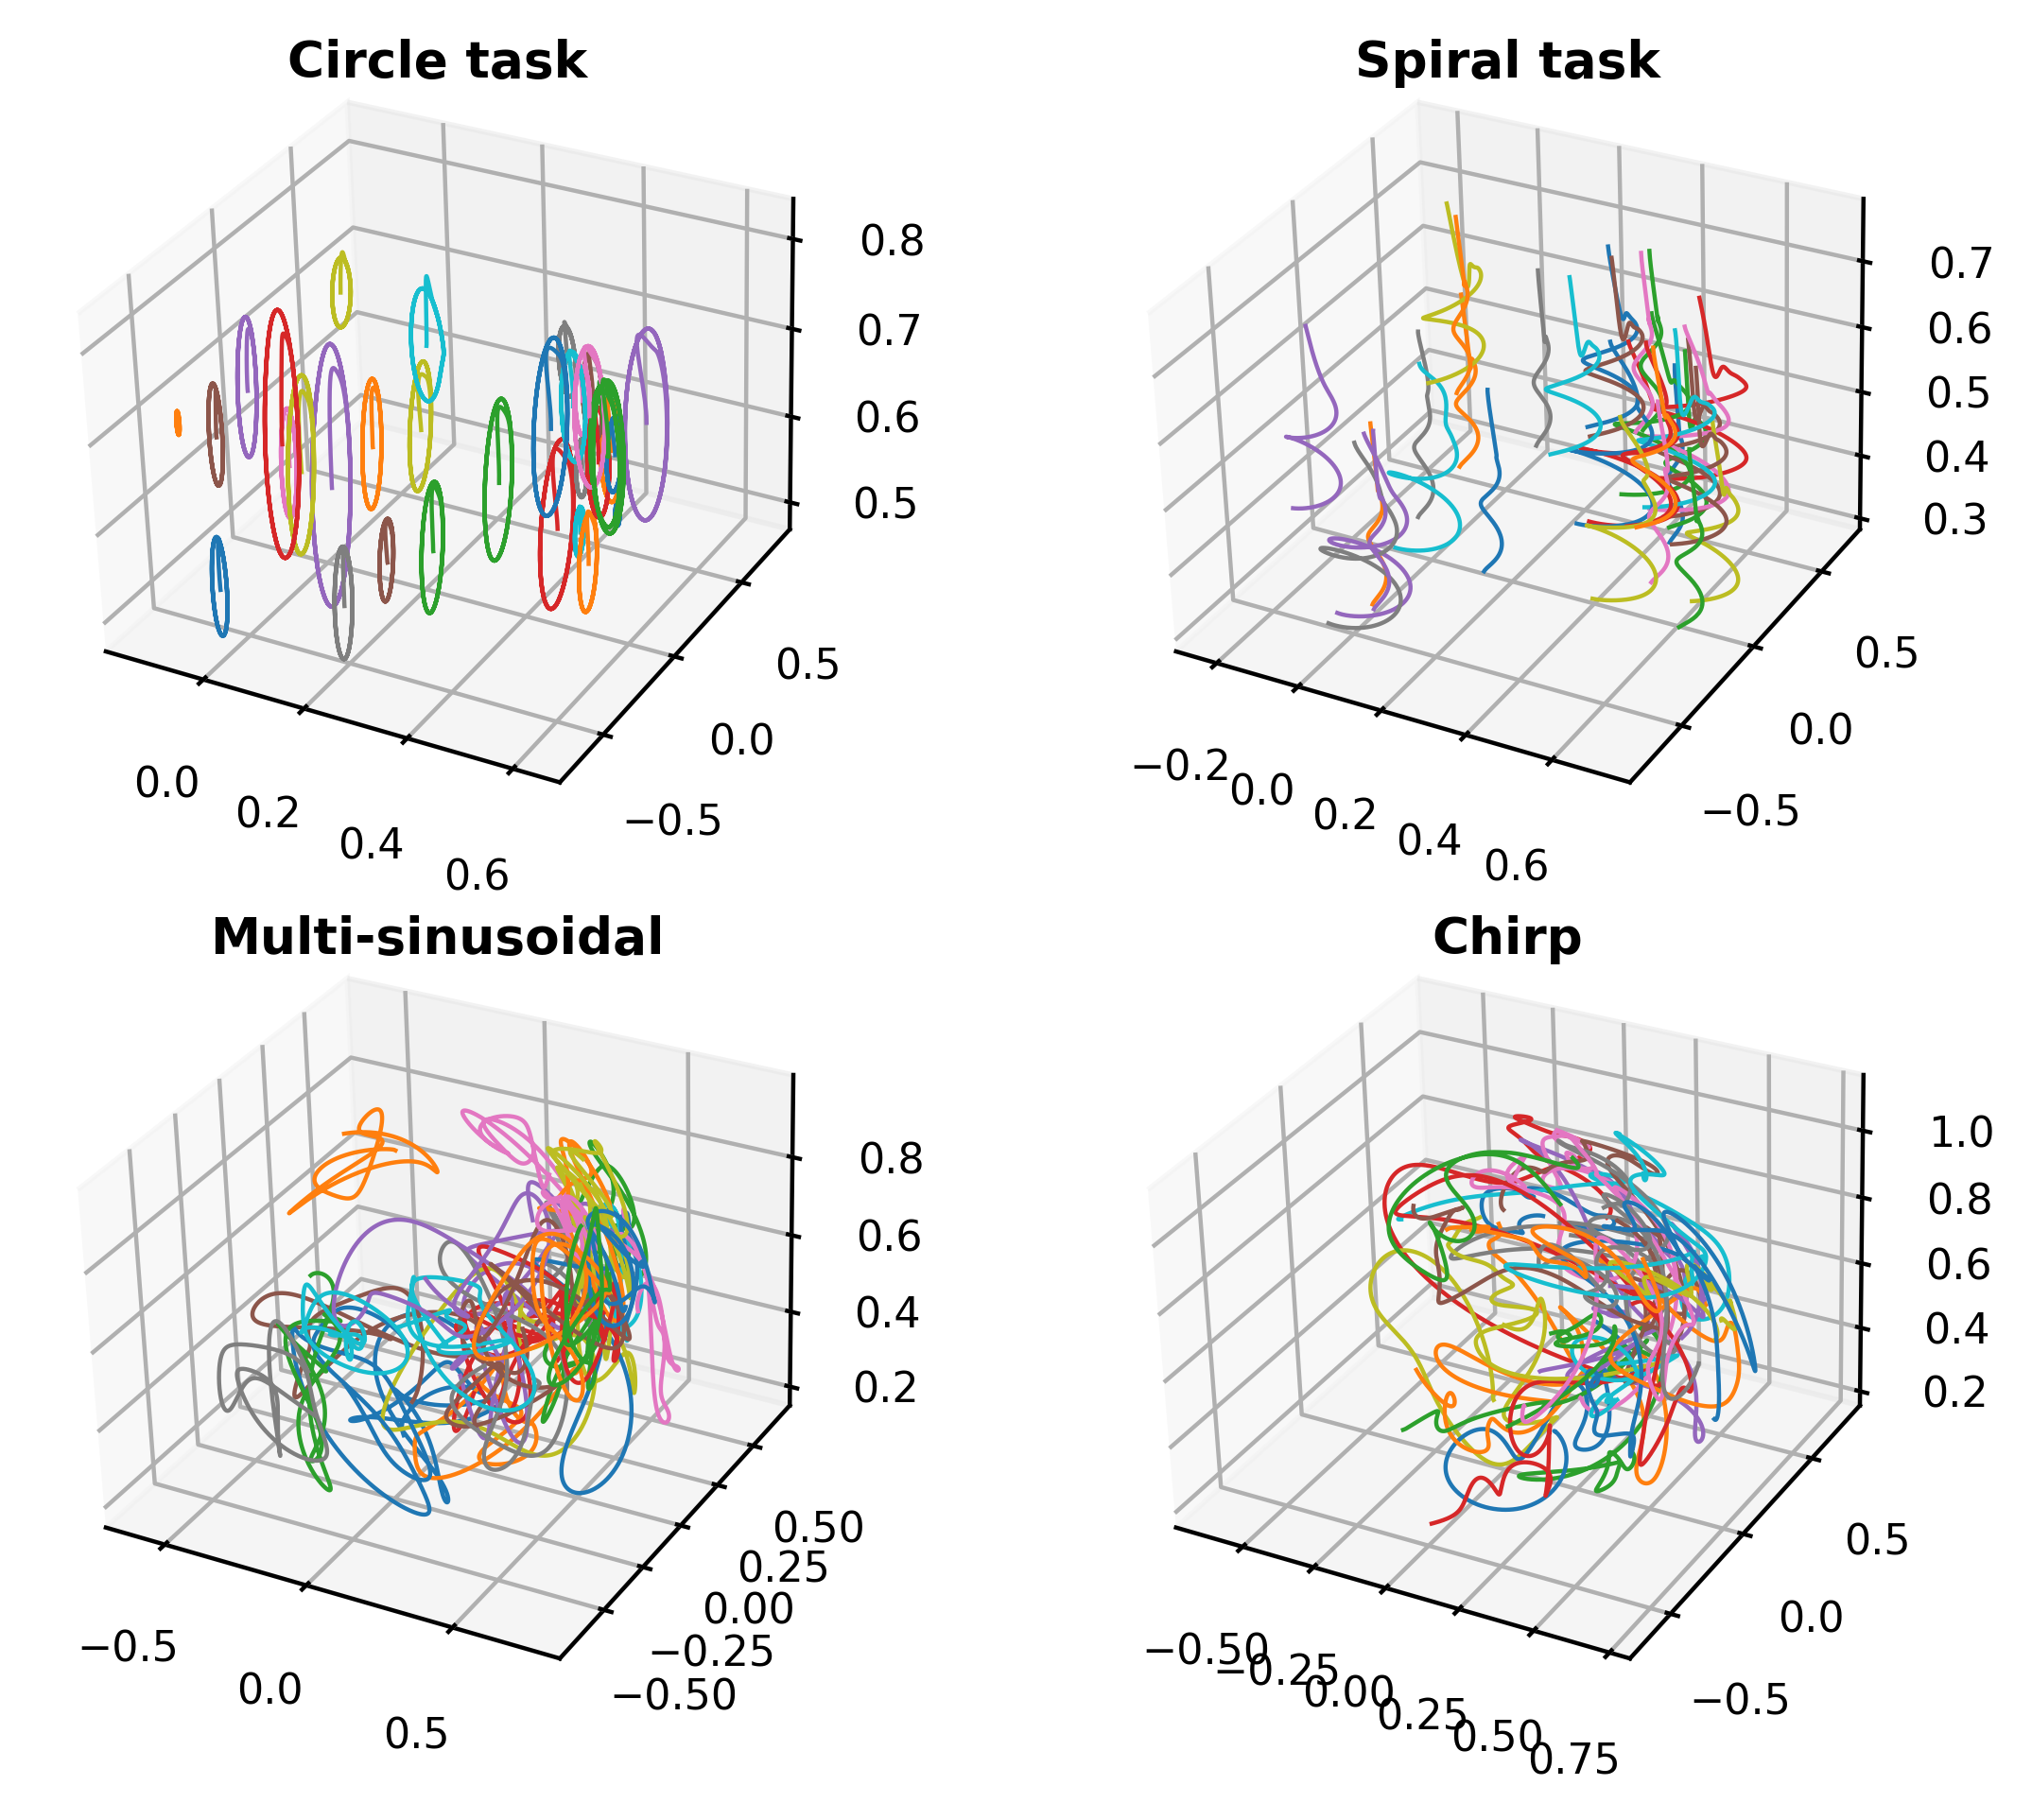

In [3]:
import matplotlib.pyplot as plt
import torch
# %matplotlib widget

num_rows = 2
num_cols = 2

num_test = 33

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 8}
plt.rc('font', **font)


# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, dpi=400, subplot_kw={'projection': '3d'})
# List of positions
positions = [position_circle, pos_vertical_spiral, position_multisinusoidal, position_chirp]

position_names = ['Circle task', 'Spiral task', 'Multi-sinusoidal', 'Chirp']

# Loop through subplots and plot data
for i in range(num_rows):
    for j in range(num_cols):
        ax = axs[i, j]
        position = positions[i * num_cols + j]
        position_name = position_names[i * num_cols + j]
        for k in range(num_test):
            # Select the desired data
            x = position[:, k, 0].to("cpu").numpy()
            y = position[:, k, 1].to("cpu").numpy()
            z = position[:, k, 2].to("cpu").numpy()

            ax.plot(x, y, z, linewidth=0.8)
            ax.set_title(position_name, y = .99, weight = 'bold')
            ax.view_init(roll = 2) 
            

# Adjust layout to prevent subplot overlap
plt.tight_layout(pad = 1.5)
# Show the plot
plt.show()
fig.savefig('3d_visualization.png',transparent=True)

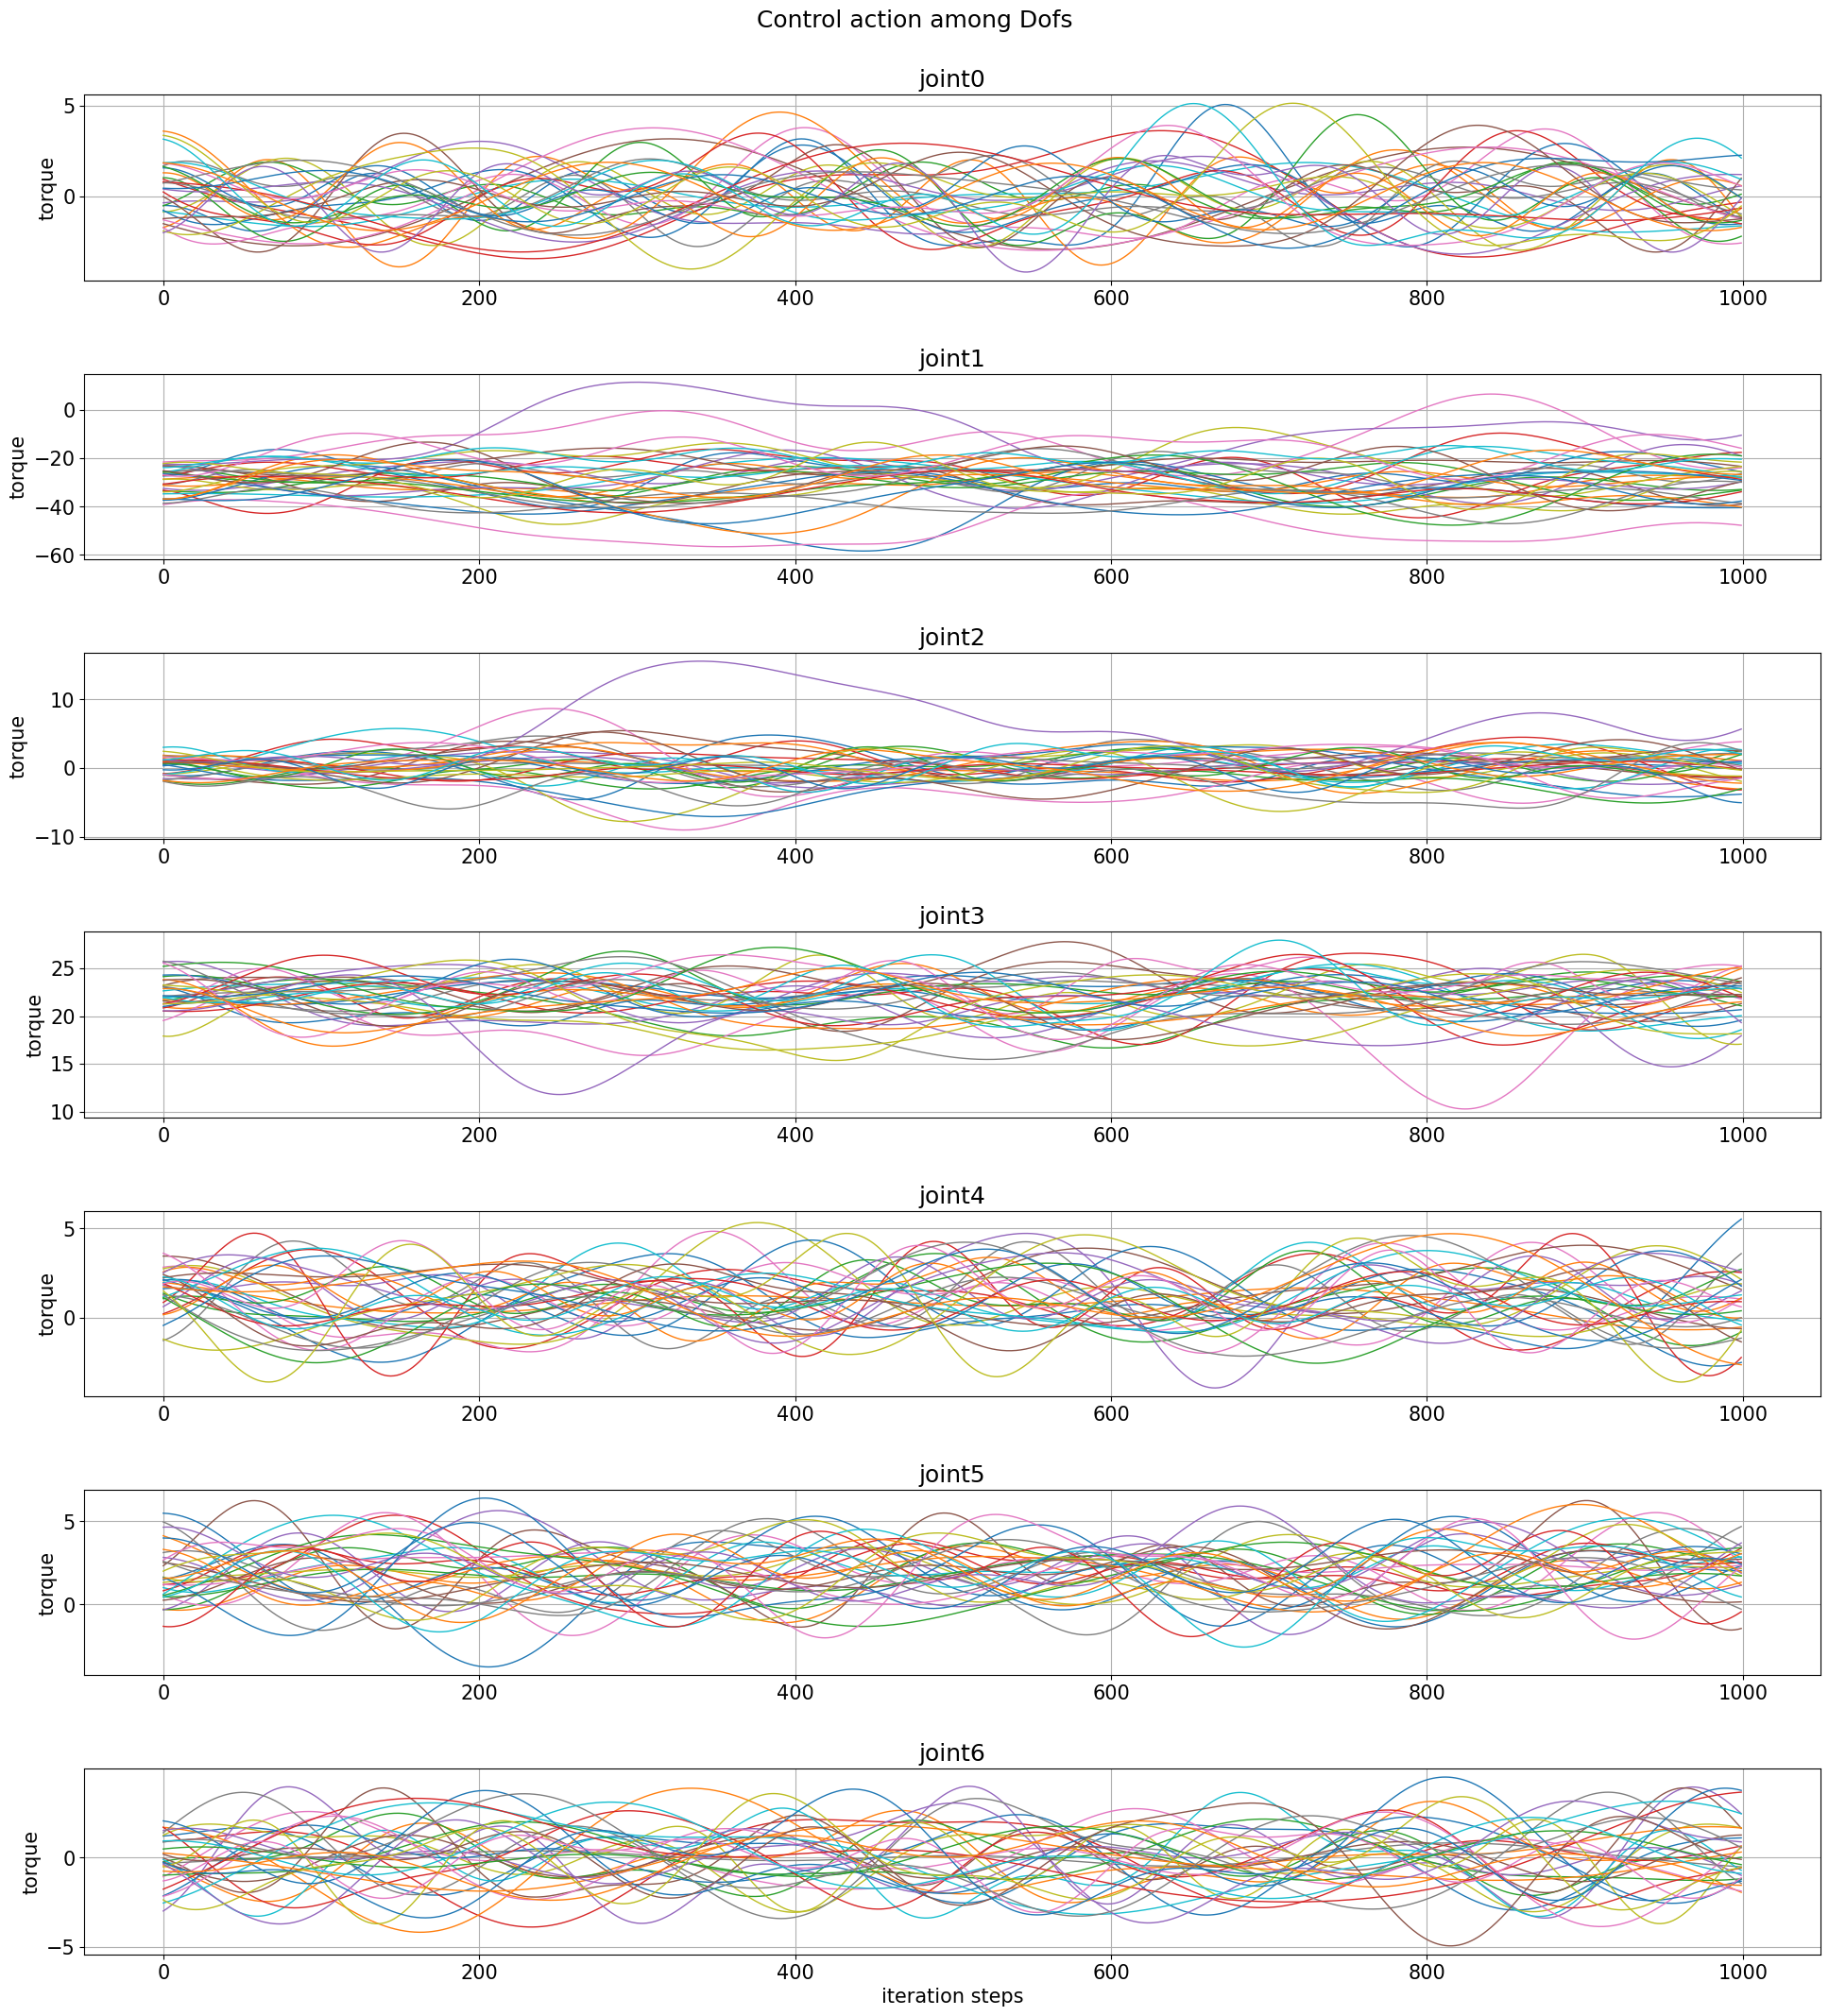

In [4]:
show = 32
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

fig, axs = plt.subplots(7, figsize=(20,22))
fig.suptitle('Control action among Dofs',y=1.2)

fig.suptitle('Control action among Dofs')
for i in range(7):
    if i <=9-1:
        axs[i].set(ylabel='torque', title='joint'+str(i)+'')
        axs[i].plot(control_action_multisinusoidal[1:,:show,i].to("cpu").numpy(),linewidth=1.0 , label = "Nominal")
    axs[i].grid()
axs[-1].set(xlabel='iteration steps')  
  
fig.tight_layout(pad=2)

multi-sinusoidal vs OSC-Spiral

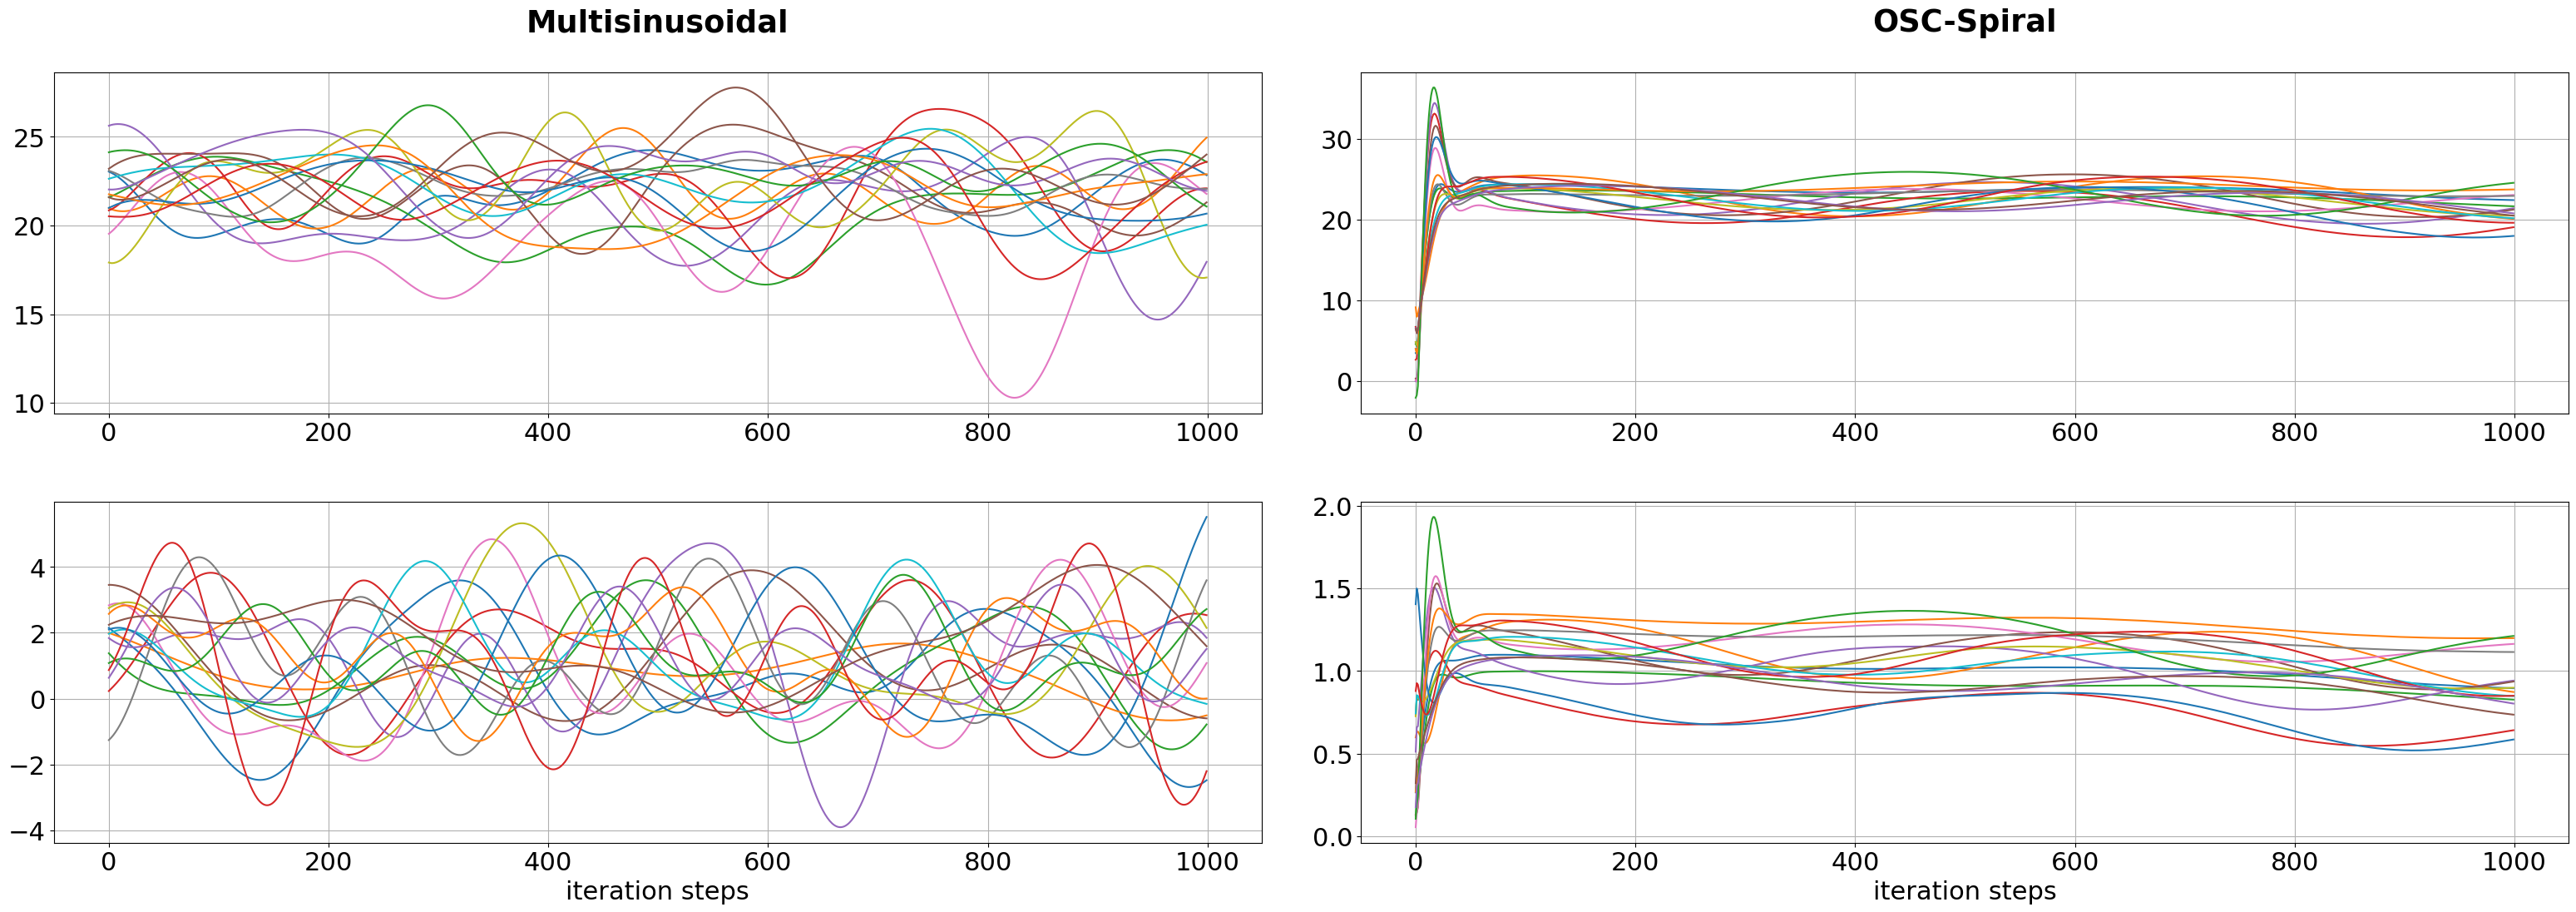

In [5]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(32,12))
# fig.suptitle('Control action among Dofs',y=1.2)

# fig.suptitle('Control action among Dofs')
axs[0,0].set_title('Multisinusoidal', fontweight='bold', y =1.1)
axs[0,1].set_title('OSC-Spiral', fontweight='bold',y =1.1)

show = 339

for i in range(0,2):
    axs[i,0].plot(control_action_multisinusoidal[1:,:16,i+3].to("cpu").numpy(),linewidth=1.5)
    axs[i,1].plot(control_vertical_spiral[1:,show:show+16,i+3].to("cpu").numpy(),linewidth=1.5)
    axs[i,0].grid()
    axs[i,1].grid()
axs[-1,0].set(xlabel='iteration steps')  
axs[-1,1].set(xlabel='iteration steps')  
  
fig.tight_layout(pad=2)
fig.savefig('control_actions.png',transparent=True)

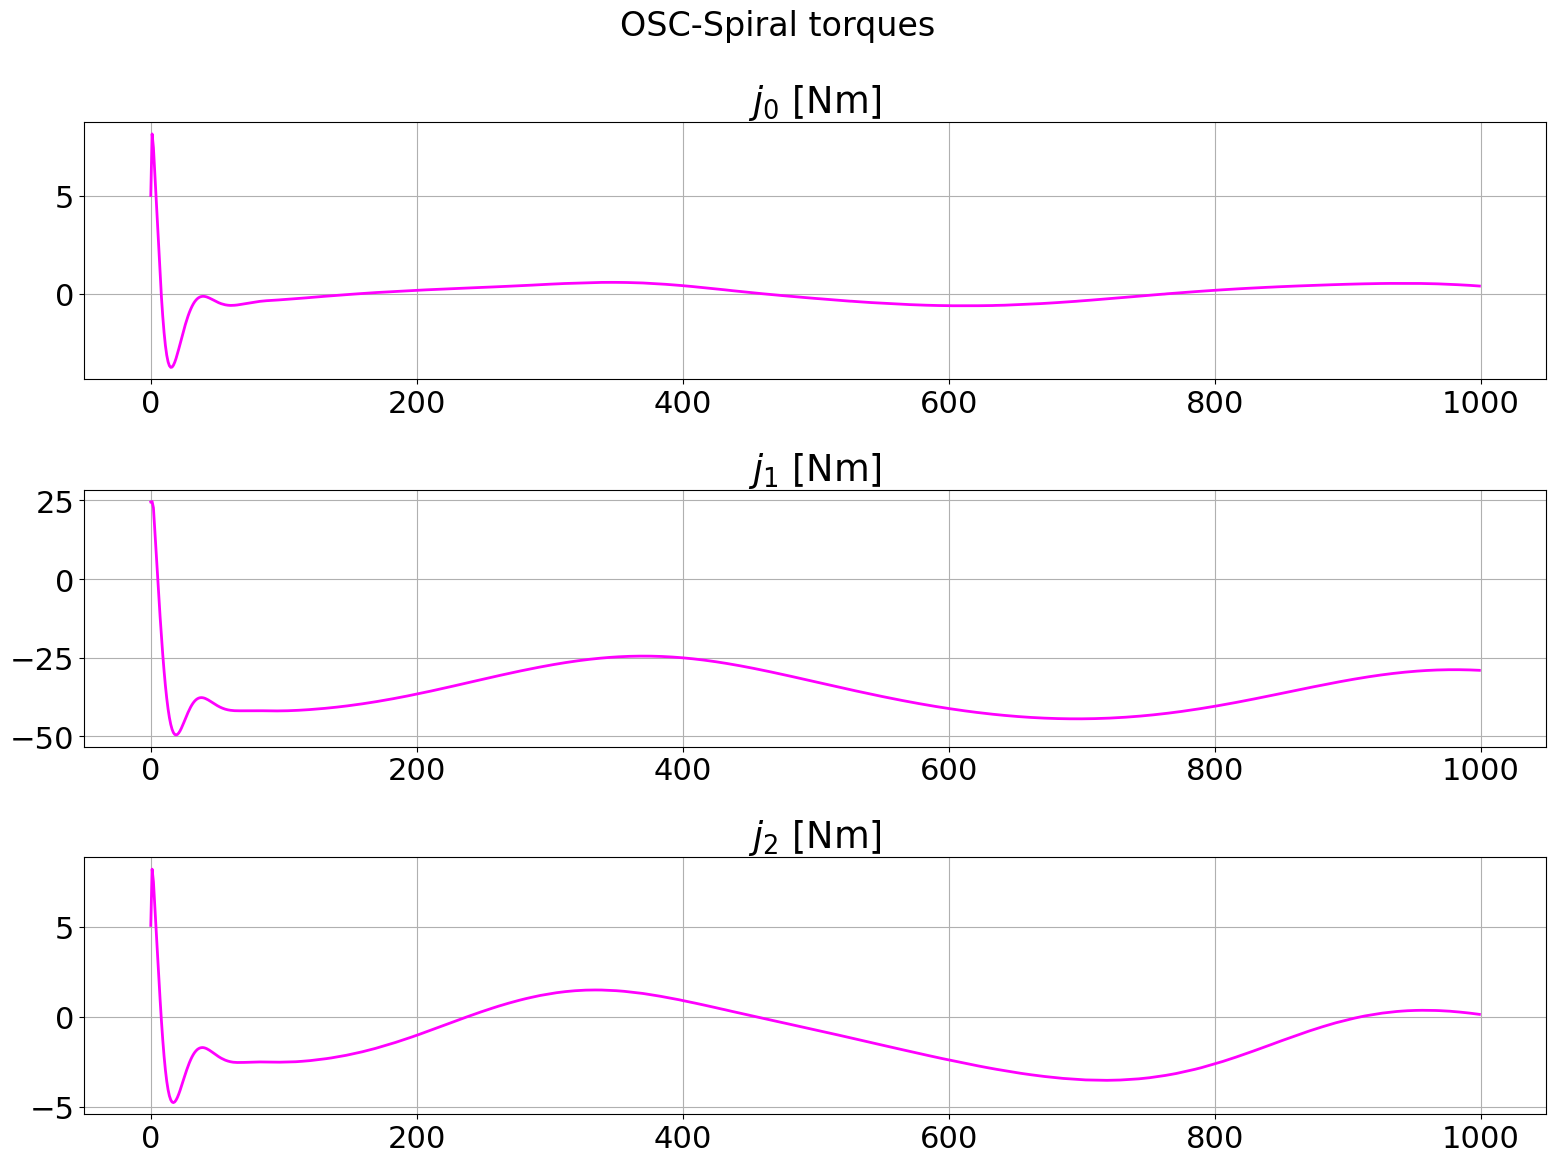

In [6]:
fontsize = 22
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : fontsize}
plt.rc('font', **font)

tot_coordinates = 3
import numpy as np 

fig, axs = plt.subplots(3,figsize=(16,12))
fig.suptitle('OSC-Spiral torques',size=fontsize+2)

label_coordinates = ['$j_0$ [Nm]', '$j_1$ [Nm]', '$j_2$ [Nm]' ] 

# fig.tight_layout()
k = 0
show = 343
for j in range(2):
    for i in range(tot_coordinates):
        if k <=2:
            if target_vertical_spiral != []:
                axs[k].plot(control_vertical_spiral[1:,show,k].to("cpu").numpy(),'magenta',linewidth=2)
                axs[k].set(title=label_coordinates[k])
                axs[k].grid()
        k = k+1

fig.tight_layout(pad=1.05)